# Simple Regression Practice

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import linear_model
from sklearn.metrics import r2_score

%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [3]:
data = pd.read_csv('house_prices_multifeature.csv')
data.head()

,Area_m2,Bedrooms,Age_years,Distance_km,Floor,Price_million
0,152,5,1,17,8,5660
1,229,1,1,8,5,7193
2,142,1,27,4,12,4407
3,64,1,21,6,12,2786
4,156,1,22,8,12,5527


In [4]:
data.describe()

,Area_m2,Bedrooms,Age_years,Distance_km,Floor,Price_million
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,149.170000,2.820000,14.190000,9.460000,7.730000,5194.440000
std,60.262231,1.452132,9.398791,6.061003,4.037338,1629.919706
min,51.000000,1.000000,0.000000,1.000000,1.000000,2119.000000
25%,100.000000,1.000000,5.000000,3.000000,5.000000,3909.250000
50%,146.500000,3.000000,15.000000,9.000000,7.000000,5054.500000
75%,203.750000,4.000000,22.250000,15.000000,12.000000,6535.750000
max,249.000000,5.000000,29.000000,19.000000,14.000000,8608.000000


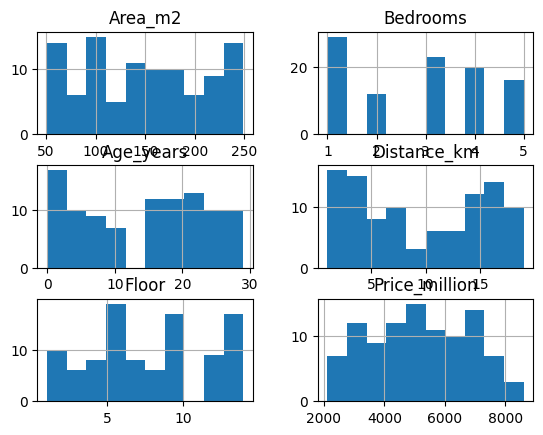

In [9]:
viz = data[['Area_m2' , 'Bedrooms' , 'Age_years' , 'Distance_km' , 'Floor' , 'Price_million']]
viz.hist()
plt.show()

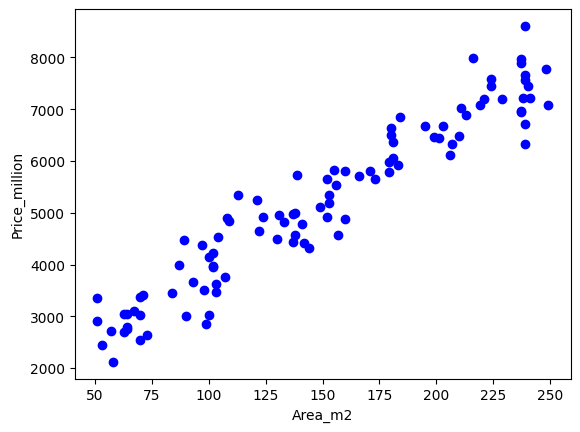

In [10]:
plt.scatter(data.Area_m2 , data.Price_million , color = 'blue')
plt.xlabel('Area_m2')
plt.ylabel('Price_million')
plt.show()

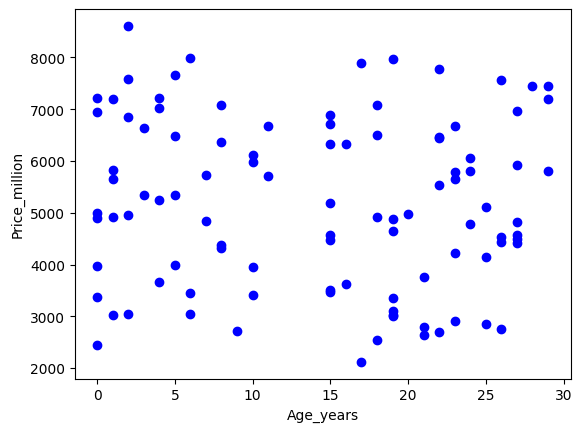

In [11]:
plt.scatter(data.Age_years , data.Price_million , color = 'blue')
plt.xlabel('Age_years')
plt.ylabel('Price_million')
plt.show()

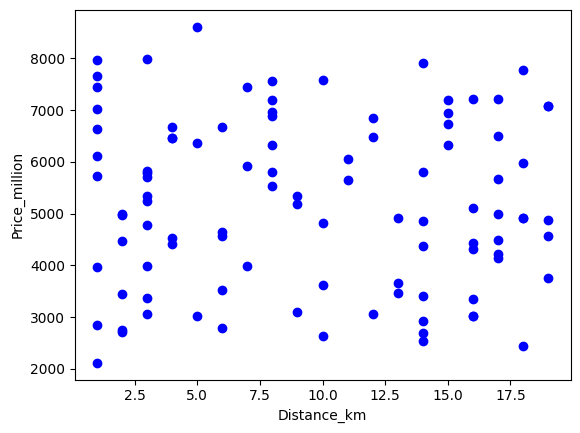

In [12]:
plt.scatter(data.Distance_km , data.Price_million , color = 'blue')
plt.xlabel('Distance_km')
plt.ylabel('Price_million')
plt.show()

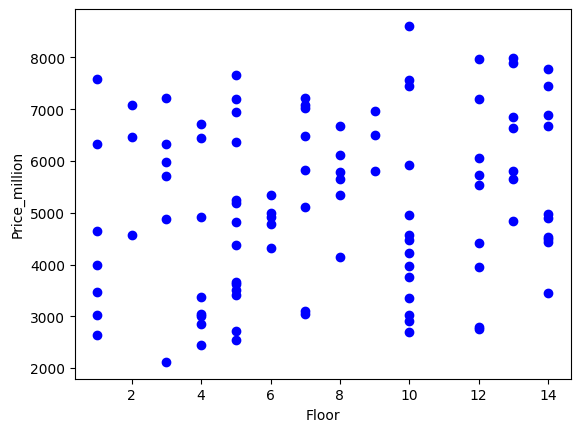

In [13]:
plt.scatter(data.Floor , data.Price_million , color = 'blue')
plt.xlabel('Floor')
plt.ylabel('Price_million')
plt.show()

 # Create Mask Data

In [14]:
mask  = np.random.rand(len(data)) < 0.8
train = data[mask]
test = data[~mask]


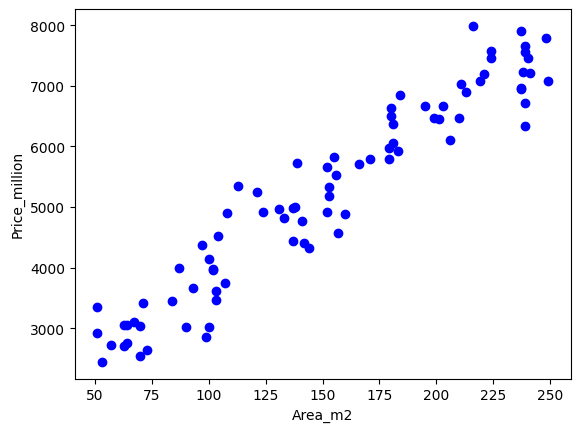

In [15]:
plt.scatter(train.Area_m2 , train.Price_million , color = 'blue')
plt.xlabel('Area_m2')
plt.ylabel('Price_million')
plt.show()

In [16]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area_m2']])
train_y = np.asanyarray(train[['Price_million']])
regr.fit(train_x , train_y)
print('COE' , regr.coef_)
print('Interceprt' , regr.intercept_)

COE [[25.53796152]]
Interceprt [1366.37769436]


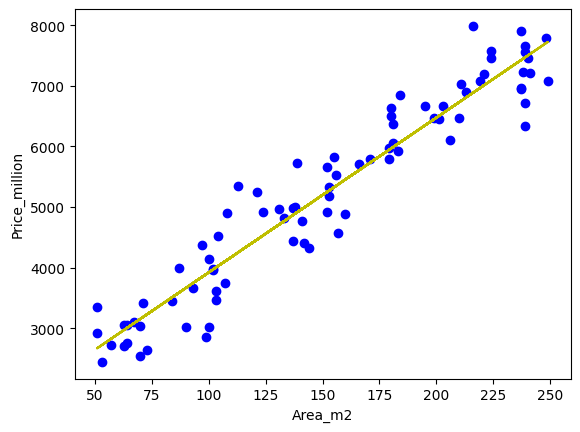

In [17]:
plt.scatter(train.Area_m2 , train.Price_million , color = 'blue')
plt.plot(train_x , regr.coef_[0][0]* train_x + regr.intercept_[0] , '-y')
plt.xlabel('Area_m2')
plt.ylabel('Price_million')
plt.show()

In [19]:
test_x = np.asanyarray(test[['Area_m2']])
test_y = np.asanyarray(test[['Price_million']])
test_y_ = regr.predict(test_x)

print('R2_Score : ' , r2_score(test_y , test_y_))

R2_Score :  0.917747235283821
